# Assignment A
### Introduction
In this assignment, we analyse the [GP Practice Prescribing dataset (April 2018)](https://digital.nhs.uk/data-and-information/publications/statistical/practice-level-prescribing-data/april-2018#summary) combined with [GP Patients Registered dataset (April 2018)](https://digital.nhs.uk/data-and-information/publications/statistical/patients-registered-at-a-gp-practice/patients-registered-at-a-gp-practice-april-2018-special-topic---registered-patients-compared-to-the-projected-resident-population-in-england#key-facts) to investigate the prescribing cost in April 2018 using python. 

### Setup
1. import necessary libraries
2. read the csv files


Please note that all the files loaded in this analysis should be located in the current working directory.  
The github url can be find [here](https://github.com/Fair95/UCL_Data_Science_PJ1)

In [1]:
# import necessary packages/modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.stats import linregress
from scipy.stats import norm


In [2]:
# Read patients data and stored as patients
patients = pd.read_csv('gp-reg-pat-prac-all.csv').rename(columns=lambda x: x.strip())

# Read rigional data of the GP Practice and stored as region
region = pd.read_csv('gp-reg-pat-prac-map.csv').rename(columns=lambda x: x.strip())

# Read prescription data and stored as presc
presc = pd.read_csv('T201804PDPI+BNFT.CSV').rename(columns=lambda x: x.strip())

# Read drug data and stored as drug
drug = pd.read_csv('T201804CHEM+SUBS.CSV').rename(columns=lambda x: x.strip())

In [3]:
pop = pd.read_csv('pop.csv').rename(columns=lambda x: x.strip())

Here is a brief view of how each data looks:

In [4]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 10 columns):
PUBLICATION           7241 non-null object
EXTRACT_DATE          7241 non-null object
TYPE                  7241 non-null object
CCG_CODE              7241 non-null object
ONS_CCG_CODE          7241 non-null object
CODE                  7241 non-null object
POSTCODE              7241 non-null object
SEX                   7241 non-null object
AGE                   7241 non-null object
NUMBER_OF_PATIENTS    7241 non-null int64
dtypes: int64(1), object(9)
memory usage: 565.8+ KB


In [5]:
patients.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070
3,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298
4,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109


In [6]:
presc.info()
# whether null values exists
print('number of Null values is:',presc.isnull().any().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9748354 entries, 0 to 9748353
Data columns (total 11 columns):
SHA         object
PCT         object
PRACTICE    object
BNF CODE    object
BNF NAME    object
ITEMS       int64
NIC         float64
ACT COST    float64
QUANTITY    int64
PERIOD      int64
            object
dtypes: float64(2), int64(3), object(6)
memory usage: 818.1+ MB
number of Null values is: 0


In [7]:
presc.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804,
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804,
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804,
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804,
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804,


In [8]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 16 columns):
PUBLICATION             7241 non-null object
EXTRACT_DATE            7241 non-null object
PRACTICE_CODE           7241 non-null object
PRACTICE_NAME           7241 non-null object
PRACTICE_POSTCODE       7241 non-null object
ONS_CCG_CODE            7241 non-null object
CCG_CODE                7241 non-null object
CCG_NAME                7241 non-null object
STP_CODE                7241 non-null object
STP_NAME                7241 non-null object
ONS_REGION_CODE         7241 non-null object
REGION_CODE             7241 non-null object
REGION_NAME             7241 non-null object
ONS_COMM_REGION_CODE    7241 non-null object
COMM_REGION_CODE        7241 non-null object
COMM_REGION_NAME        7241 non-null object
dtypes: object(16)
memory usage: 905.2+ KB


In [9]:
region.head()

,PUBLICATION,EXTRACT_DATE,PRACTICE_CODE,PRACTICE_NAME,PRACTICE_POSTCODE,ONS_CCG_CODE,CCG_CODE,CCG_NAME,STP_CODE,STP_NAME,ONS_REGION_CODE,REGION_CODE,REGION_NAME,ONS_COMM_REGION_CODE,COMM_REGION_CODE,COMM_REGION_NAME
0,GP_PRAC_PAT_LIST,01-Apr-18,A81001,THE DENSHAM SURGERY,TS18 1HU,E38000075,00K,NHS Hartlepool and Stockton-on-Tees CCG,E54000045,"Durham, Darlington, Teesside, Hambleton, Richm...",E39000039,Q74,NHS England North (Cumbria and North East),E40000001,Y54,North Of England
1,GP_PRAC_PAT_LIST,01-Apr-18,A81002,QUEENS PARK MEDICAL CENTRE,TS18 2AW,E38000075,00K,NHS Hartlepool and Stockton-on-Tees CCG,E54000045,"Durham, Darlington, Teesside, Hambleton, Richm...",E39000039,Q74,NHS England North (Cumbria and North East),E40000001,Y54,North Of England
2,GP_PRAC_PAT_LIST,01-Apr-18,A81004,BLUEBELL MEDICAL CENTRE,TS5 8SB,E38000162,00M,NHS South Tees CCG,E54000045,"Durham, Darlington, Teesside, Hambleton, Richm...",E39000039,Q74,NHS England North (Cumbria and North East),E40000001,Y54,North Of England
3,GP_PRAC_PAT_LIST,01-Apr-18,A81005,SPRINGWOOD SURGERY,TS14 7DJ,E38000162,00M,NHS South Tees CCG,E54000045,"Durham, Darlington, Teesside, Hambleton, Richm...",E39000039,Q74,NHS England North (Cumbria and North East),E40000001,Y54,North Of England
4,GP_PRAC_PAT_LIST,01-Apr-18,A81006,TENNANT STREET MEDICAL PRACTICE,TS18 2AT,E38000075,00K,NHS Hartlepool and Stockton-on-Tees CCG,E54000045,"Durham, Darlington, Teesside, Hambleton, Richm...",E39000039,Q74,NHS England North (Cumbria and North East),E40000001,Y54,North Of England


In [10]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496 entries, 0 to 3495
Data columns (total 4 columns):
CHEM SUB    3496 non-null object
NAME        3496 non-null object
201804      3496 non-null object
            0 non-null float64
dtypes: float64(1), object(3)
memory usage: 109.3+ KB


In [11]:
drug.head()

,CHEM SUB,NAME,201804,
0,0101010A0,Alexitol Sodium ...,,NaN
1,0101010B0,Almasilate ...,,NaN
2,0101010C0,Aluminium Hydroxide ...,,NaN
3,0101010D0,Aluminium Hydroxide With Magnesium ...,,NaN
4,0101010E0,Hydrotalcite ...,,NaN


### Descriptive summary
In this assignment, there are four csv files analysed. `presc` dataframe contains 9748354 observations and 11 attributes. `patients` dataframe consists of 7241 records with 10 attributes. `region` dataframe is composed of 7241 rows and 16 columns. `drug` is a dataframe with a dimension of 3496x4. No missing values or NULL value exist in any of the dataframe. It is noted that, despite different names displayed in the dataframes, `presc`, `patients` and `region` all contain a column of **GP practice code** which is named `PRACTICE`, `CODE` AND `PRACTICE_CODE` respectively. The **GP practice code** is an important feature that is used to join the information together. However, this leads to issues where some **GP practice code** in `region` and `patients` are not in presence in `presc` and vice versa. This is potentially due to fact that some practices only provide incomplete information to the NHS in April 2018.

In [12]:
print('Number of practices in \'presc\' dataframe:',len(presc['PRACTICE'].unique()))
print('Number of practices in \'region\' dataframe:',region['PRACTICE_CODE'].count())
print('Number of practices in \'patients\' dataframe:',patients['CODE'].count())
print('Percentage of similarity between \'region\' and \'patients\' dataframe:'
      ,100*len(set(patients['CODE']).intersection(set(region['PRACTICE_CODE'])))/max(len(set(patients['CODE'])),len(set(region['PRACTICE_CODE']))))
print('Percentage of similarity between \'region\' and \'presc\' dataframe:'
      ,100*len(set(patients['CODE']).intersection(set(presc['PRACTICE'])))/max(len(set(patients['CODE'])),len(set(presc['PRACTICE']))))


Number of practices in 'presc' dataframe: 9578
Number of practices in 'region' dataframe: 7241
Number of practices in 'patients' dataframe: 7241
Percentage of similarity between 'region' and 'patients' dataframe: 100.0
Percentage of similarity between 'region' and 'presc' dataframe: 75.07830444769263


### Comparison between practices in London and practices in Cambridge
As we can see from the descriptive summary above, `patients` table contains general information about the GP practice, including where each GP practice is located and the number of patients registered in each GP practice. On the other hand, `presc` table provides information about all the prescriptions made in April 2018. The two tables are associated using practice code.  
In order to compare the practices between London and Cambridge, we will use `patients` and `region` dataframes since the practices recorded in both dataframes are consistent. As is suggested by [CCG names and codes in England](http://geoportal.statistics.gov.uk/datasets/4010cd6fc6ce42c29581c4654618e294_0), 32 CCG codes ranging from ***07L*** to ***09A*** are used to uniquely identify all GP practices located in London. All districts in London including outer London and Great London are considered as London in our context ([See here for further information](https://www.doogal.co.uk/london_postcodes.php). However, GP practices based in Cambridge cannot be uniquely identified with CCG code since it shares a [CCG code](https://openprescribing.net/ccg/06H/measures/) with Peterborough. Fortunately, Cambridge city has its own set of [postcodes](https://en.wikipedia.org/wiki/CB_postcode_area) (***CB1 CB2 CB3 CB4 CB5 CB21 CB22 CB23 CB24 CB25***).   Therefore, we can extract GP practices in London based on CCG code but use postcodes to identify GP practices in Cambridge instead. 

Here we use `region` dataframe to find out all GP practices. 

In [13]:
# Extract GP practices in London and cambridge from patients table
london = region[(region['CCG_CODE']>='07L')&(region['CCG_CODE']<='09A')]
cambridge = region[region['PRACTICE_POSTCODE'].str.contains('^CB[1345][\s]|^CB[2][12345]?[\s]')]

After retrieving the relevant regional information for GP practices in both regions, we can use `PRACTICE_CODE` as the foreign key to filter out the information we need in `patients` dataframe and store the subset of the dataframe in local variables.

In [14]:
# extract patient information in that only belongs to GP practices in London
pat_lon = patients[patients['CODE'].isin(london['PRACTICE_CODE'])]
pat_cam = patients[patients['CODE'].isin(cambridge['PRACTICE_CODE'])]

In [15]:
# number of practices in London
print('number of practices in London is:',london['PRACTICE_CODE'].count())

# number of practices in Cambridge
print('number of practices in Cambridge is:',cambridge['PRACTICE_CODE'].count())

# Number of patients in London
print('number of patients registered in London is:',pat_lon['NUMBER_OF_PATIENTS'].sum())

# Number of patients in Cambridge
print('number of patients registered in Cambridge is:',pat_cam['NUMBER_OF_PATIENTS'].sum())

number of practices in London is: 1323
number of practices in Cambridge is: 34
number of patients registered in London is: 9851208
number of patients registered in Cambridge is: 335195


In order to compare the number of prescriptions between two cities, we need to subset the `presc` dataframe to produce two sub-dataframes which contain prescription records for London and Cambridge, respectively. This is done through `PRACTICE` variable which is known as `CODE` in `patients` frame as suggested in the section of Descriptive summary.

In [16]:
# subset the presc table based on practice code to only keep GP practices in London or Cambridge
presc_london = presc[presc['PRACTICE'].isin(london['PRACTICE_CODE'])]
presc_cambridge = presc[presc['PRACTICE'].isin(cambridge['PRACTICE_CODE'])]

In [17]:
print('number of prescriptions in London is:',presc_london['PCT'].count())
print('number of prescriptions in London is:',presc_cambridge['PCT'].count())

number of prescriptions in London is: 1401350
number of prescriptions in London is: 43737


In [18]:
print('total actual cost of prescription in London is:',presc_london['ACT COST'].sum())
print('total actual cost of prescription in Cambridge is:',presc_cambridge['ACT COST'].sum())

total actual cost of prescription in London is: 76586738.71000002
total actual cost of prescription in Cambridge is: 2613729.8200000003


### Find top/bot 10 drugs
The dataframe used in this section are `presc` and `drug`. `presc` has a column `BNF CODE` which describes the drugs, dressings or appliances in each prescription. The detailed information of the chemical substances is stored in `NAME` column in `drug` dataframe which can be acquired using `CHEM SUB` which are references to `BNF CODE`.

In the `presc` dataframe, we also have dressings and appliances included instead of only prescribed drugs. To address this issue, we can manually select prescriptions that only relate to drugs based on [BNF categories](https://openprescribing.net/bnf/). Specifically, drugs have BNF code starting with 01, dressings have BNF code starting with 20, appliances have BNF code starting with 21, 22 or 23. The first 9 digits in BNF code of drugs uniquely define a drug, thus, `BNF CODE` is sliced accordingly to group the same drugs together.

To obtain top 10 most prescribed drugs in London, we simply count the number of drugs prescribed based on their BNF code and select the drugs with top 10 count values.  Similarly, we simply use the bottom 10 count values as our least prescribed drugs. The above procedure can be replicated to get top 10 and bottom 10 drugs prescribed in Cambridge.



In [19]:
# Drugs have BNF codes with the first two digits straing from 00-19, dressings have BNF code with 20 as the starting 
# digits, appliances start from 21 to 23.
presc_drug_l = presc_london[presc_london['BNF CODE'].str.contains('^[01]')]
presc_drug_c = presc_cambridge[presc_cambridge['BNF CODE'].str.contains('^[01]')]
presc_dressing_l = presc_london[presc_london['BNF CODE'].str.contains('^[2][0]')]
presc_dressing_c = presc_cambridge[presc_cambridge['BNF CODE'].str.contains('^[2][0]')]
presc_appliance_l = presc_london[presc_london['BNF CODE'].str.contains('^[2][123]')]
presc_appliance_c = presc_cambridge[presc_cambridge['BNF CODE'].str.contains('^[2][123]')]

In [20]:
# Count the frequency of the prescription based on BNF code and use top 10 frequent durgs in London
top10drugcode_l = presc_drug_l['BNF CODE'].str.slice(0,9).value_counts().head(10)

# Extract the name of the drug
top10drug_l = drug[drug['CHEM SUB'].isin(top10drugcode_l.index)]['NAME'].values

print('Top 10 most frequent prescribed drugs in London are:')
for i in range(10):
    print(top10drug_l[i].strip(),'-',top10drugcode_l[i],'times')

Top 10 most frequent prescribed drugs in London are:
Diltiazem Hydrochloride - 27555 times
Beclometasone Dipropionate - 15738 times
Fluticasone Propionate (Inh) - 14509 times
Sodium Valproate - 13806 times
Glucose Blood Testing Reagents - 13339 times
Enteral Nutrition - 12579 times
Colecalciferol - 9676 times
Other Emollient Preps - 9380 times
Betamethasone Valerate - 9309 times
Hydrocortisone - 9184 times


In [21]:
# Count the frequency of the prescription based on BNF code and use bottom 10 frequenct drugs in London
bot10drugcode_l = presc_drug_l['BNF CODE'].str.slice(0,9).value_counts().tail(10)

# Extract the name of the drug
bot10drug_l = drug[drug['CHEM SUB'].isin(bot10drugcode_l.index)]['NAME'].values

print('Bottom 10 less frequent prescribed drugs in London are:')
for i in range(10):
    print(bot10drug_l[i].strip(),'-',bot10drugcode_l[i],'times')

Bottom 10 less frequent prescribed drugs in London are:
Phenol - 1 times
Other Preparations For Biliary Disorders - 1 times
Alirocumab - 1 times
Aspirin & Caffeine - 1 times
Abacavir - 1 times
Other HIV Infection Preps - 1 times
Teriparatide - 1 times
Yohimbine Hydrochloride - 1 times
Iron Carboxymaltose - 1 times
Glucosamine Sulf (Rheumatic) - 1 times


In [22]:
# Count the frequency of the prescription based on BNF code and use top 10 frequent durgs in Cambridge
top10drugcode_c = presc_drug_c['BNF CODE'].str.slice(0,9).value_counts().head(10)

# Extract the name of the drug
top10drug_c = drug[drug['CHEM SUB'].isin(top10drugcode_c.index)]['NAME'].values

print('Top 10 most frequent prescribed drugs in Cambridge are:')
for i in range(10):
    print(top10drug_c[i].strip(),'-',top10drugcode_c[i],'times')

Top 10 most frequent prescribed drugs in Cambridge are:
Macrogol 3350 - 748 times
Diltiazem Hydrochloride - 541 times
Beclometasone Dipropionate - 464 times
Fluticasone Propionate (Inh) - 403 times
Venlafaxine - 363 times
Glucose Blood Testing Reagents - 344 times
Enteral Nutrition - 341 times
Colecalciferol - 318 times
Other Emollient Preps - 318 times
Betamethasone Valerate - 312 times


In [23]:
# Count the frequency of the prescription based on BNF code and use bottom 10 frequent durgs in Cambridge
bot10drugcode_c = presc_drug_c['BNF CODE'].str.slice(0,9).value_counts().tail(10)

# Extract the name of the drug
bot10drug_c = drug[drug['CHEM SUB'].isin(bot10drugcode_c.index)]['NAME'].values

print('Bottom 10 less frequent prescribed drugs in Cambridge are:')
for i in range(10):
    print(bot10drug_c[i].strip(),'-',bot10drugcode_c[i],'times')

Bottom 10 less frequent prescribed drugs in Cambridge are:
Alverine Citrate/Simeticone - 1 times
Lidocaine Hydrochloride - 1 times
Acebutolol Hydrochloride - 1 times
Sildenafil(Vasodilator Antihypertensive) - 1 times
Valsartan/Amlodipine - 1 times
Sodium Cromoglicate - 1 times
Tetracosactide - 1 times
Flutamide - 1 times
Pilocarpine Nitrate - 1 times
Doxepin Hydrochloride - 1 times


- We actually see that more than 10 drugs only prescribed once, therefore, it would be more intuitive to find all drugs that only prescribed once in each region.

In [24]:
print("Number of drugs only prescribed once in London is:",(presc_drug_l['BNF CODE'].str.slice(0,9).value_counts()==1).sum())
print("Number of drugs only prescribed once in Cambridge is:",(presc_drug_c['BNF CODE'].str.slice(0,9).value_counts()==1).sum())

Number of drugs only prescribed once in London is: 99
Number of drugs only prescribed once in Cambridge is: 129


In [25]:
# Find the common top10 prescribed drugs
drug[drug['CHEM SUB'].isin(set(top10drugcode_l.index).intersection(top10drugcode_c.index))]['NAME']

393     Diltiazem Hydrochloride                       ...
612     Beclometasone Dipropionate                    ...
615     Fluticasone Propionate (Inh)                  ...
1542    Glucose Blood Testing Reagents                ...
2198    Enteral Nutrition                             ...
2282    Colecalciferol                                ...
2872    Other Emollient Preps                         ...
2915    Betamethasone Valerate                        ...
Name: NAME, dtype: object

It appears that there are 8 drugs mostly prescribed in both city:
- Diltiazem Hydrochloride
- Beclometasone Dipropionate
- Fluticasone Propionate (Inh)
- Glucose Blood Testing Reagents
- Enteral Nutrition
- Colecalciferol
- Other Emollient Preps
- Betamethasone Valerate

Meanwhile, many drugs are only prescribed once in both regions. Those drugs are likely to be associated with rare diseases. Specifically, the number of drugs that only prescribed once in each region is:
- London: 99
- Cambridge: 129



### Conclusion
London, due to its capacity of GP practices (about 40 times larger), had a larger number of prescriptions than Cambridge (about 32 times more). The total cost spent on prescriptions is thus about 29 times larger in London than in Cambridge. The number of patients registered in London is about 30 times more than that in Cambridge, which indicates that the prescription cost per patient is about the same in two regions.  Despite a larger number of prescriptions and GP practices in London, eight drugs are most popular in both regions which indicates those drugs are like to be related to diseases with high prevalence.


### Prescriptions costs for cardiovascular disease and antidepressants
According to [BNF Codebook](https://openprescribing.net/bnf/), the drugs prescribed for cardiovascular disease has a BNF code started with **02** and the drugs prescribed for antidepressants has a BNF code started with **0403**. By utilising this information, we can easily subset the `presc` to get all drugs for each disease as well as associated costs. The total cost can be summed up subsequently.

In [26]:
# Find all drugs for cardiovascular disease using regex expression ^02, indicating any BNF codes starting with 02.
print('Total number of prescriptions for cardiovascular disease is:',presc[presc['BNF CODE'].str.contains('^02')]['ACT COST'].count())
print('Total cost for cardiovascular disease is:',presc[presc['BNF CODE'].str.contains('^02')]['ACT COST'].sum())

# Find all drugs for cardiovascular disease using regex expression ^0403, indicating any BNF codes starting with 0403.
print('Total number of prescriptions for antidepressants is:',presc[presc['BNF CODE'].str.contains('^0403')]['ACT COST'].count())
print('Total cost for antidepressants is:',presc[presc['BNF CODE'].str.contains('^0403')]['ACT COST'].sum())


Total number of prescriptions for cardiovascular disease is: 1330453
Total cost for cardiovascular disease is: 90193834.01999994
Total number of prescriptions for antidepressants is: 312757
Total cost for antidepressants is: 16853470.86


We can see that the number of prescriptions for cardiovascular disease is significantly larger than for antidepressants. Consequently, the cost is also significantly higher for cardiovascular disease.

### Monthly total spending versus the total number of registered patients
By creating a scatter plot of the monthly total spending against the total number of registered patients, we can create a linear fitted trend line, which can be used to predict the total spending given any input of the total number of registered patients. It is a valuable prediction model to manage the spending for the coming month in the future.  

Additionally, we will see how potential outlier can influence the prediction model by training the regression model with potential outliers removed. In common practice, the outliers tend to be more than 3 times standard deviation away from the sample mean. We will use this rule to define potential outliers.

In [27]:
# Calculate total cost for each GP practice
total_cost = presc.groupby('PRACTICE').sum()[['ACT COST']]

# Merge the total cost and number of patients into one table using practice code as the foreign key.
merged = pd.merge(total_cost,patients[['CODE','NUMBER_OF_PATIENTS']],left_on = 'PRACTICE',right_on='CODE')

merged.set_index('CODE',inplace = True)

(0, 264157.0)

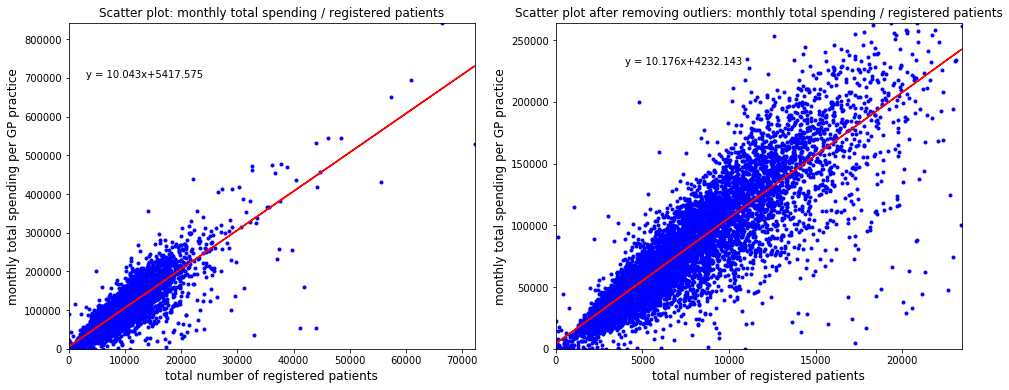

In [28]:
# display the figure in cell
%matplotlib inline

# specify the figure size
fig=plt.figure(figsize=(16, 6))
# just draw one figure (dimension 1x1)
ax=fig.add_subplot(121)
# x (number of patients for each GP practice) is the independent variable, y (total cost of prescription for each GP
# practice) is the dependent variable
x = merged['NUMBER_OF_PATIENTS']
y = merged['ACT COST']



# draw scatter plot using blue dots
ax.scatter(x, y, color='b',marker='.')

# calculate the coefficient for the fitted line using polynomial fitting with degree of 1 (linear relationship)
slope, intercept, r_value, p_value, std_err = linregress(x,y)

# draw the fitted line using red color to distinguish and display the fitted equation
equation = 'y = %.3fx+%.3f'%(slope,intercept)
ax.text(3000,700000,equation,fontsize=10)
ax.plot(x, slope * x + intercept, color='r')

# set the title, label, margin of the figure
ax.set_title('Scatter plot: monthly total spending / registered patients')
ax.set_xlabel("total number of registered patients",fontsize=12)
ax.set_ylabel("monthly total spending per GP practice",fontsize=12)
max_x = np.floor(x.max())
max_y = np.floor(y.max())
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)



## Now we repeat the process for the dataset where potential outliers are removed
## if a datapoint has either x or y with a z-score larger than 3 (i.e. 3 standard deviation away from the mean),it
## implies this datapoint may be an outlier
x_ = x[(np.abs(scipy.stats.zscore(x.values)) < 3)&(np.abs(scipy.stats.zscore(y.values)) < 3)]
y_ = y[(np.abs(scipy.stats.zscore(x.values)) < 3)&(np.abs(scipy.stats.zscore(y.values)) < 3)]
ax=fig.add_subplot(122)
# draw scatter plot using blue dots
ax.scatter(x_, y_, color='b',marker='.')

# calculate the coefficient for the fitted line using polynomial fitting with degree of 1 (linear relationship)
slope_, intercept_, r_value_, p_value_, std_err_ = linregress(x_,y_)

# draw the fitted line using red color to distinguish and display the fitted equation
equation = 'y = %.3fx+%.3f'%(slope_,intercept_)
ax.text(4000,230000,equation,fontsize=10)
ax.plot(x_, slope_ * x_ + intercept_, color='r')

# set the title, label, margin of the figure
ax.set_title('Scatter plot after removing outliers: monthly total spending / registered patients')
ax.set_xlabel("total number of registered patients",fontsize=12)
ax.set_ylabel("monthly total spending per GP practice",fontsize=12)
max_x = np.floor(x_.max())
max_y = np.floor(y_.max())
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)

In [29]:
# varify the linear equation model
print('p-value for slope:',p_value)
print('The percentage of variance explained is:',r_value**2)

# varify the linear equation model
print('excluding potential outliers: p-value for slope:',p_value_)
print('excluding potential outliers: The percentage of variance explained is:',r_value_**2)

p-value for slope: 0.0
The percentage of variance explained is: 0.7684899354368006
excluding potential outliers: p-value for slope: 0.0
excluding potential outliers: The percentage of variance explained is: 0.7467022681893226


The p-value is very small for slope coefficient, which indicates there is a positive linear relationship between the total number of registered patients and monthly total spending per GP practice. Furthermore, the linear regression model has an R<sup>2</sup> of 0.79 indicating about 79% variance of monthly total spending per GP practice is explained by the total number of registered patients in that GP practice. Based on the regression model, we can conclude that each increased number of registered patient will result in 10.043 pounds increase in monthly total spending for drugs. 

After removing potential outliers, we can see that the R<sup>2</sup> is actually decreased. Therefore, those data points actually contribute to the prediction and should be included.

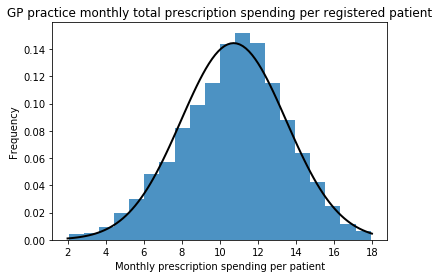

In [30]:
# Calculate the cost per patient for each GP practice
cost_patient = merged
cost_patient['cost_per_patient'] = cost_patient['ACT COST'] / cost_patient['NUMBER_OF_PATIENTS'] 

x = cost_patient['cost_per_patient'].values

# Remove extreme values that are most likely to be outliers
min_x = np.floor(cost_patient['cost_per_patient'].quantile(.01))
max_x = np.floor(cost_patient['cost_per_patient'].quantile(.99))
x = [i for i in x if (i<max_x)&(i>min_x)]

# Plot the histogram with 50 bins
plt.hist(x, bins=20,density=True,alpha=0.8)

# label the axis
plt.xlabel("Monthly prescription spending per patient")
plt.ylabel("Frequency")

# add title to the plot
plt.title("GP practice monthly total prescription spending per registered patient")

# fit a Gaussian curve and generate mean and standard deviation
mu, std = norm.fit(x)
# create 100 equally-spaced points within the range of the figure
x_h = np.linspace(min_x, max_x, 100)
# drow probability density function with the mean and standard deviation
p = norm.pdf(x_h, mu, std)
# superposition the Gaussian distribution for the cost per patients
plt.plot(x_h, p, 'k', linewidth=2)



As we can see from the figure, after removing extreme data points, *GP practice monthly total prescription spending per registered patient* exhibits a distribution that is close to Gaussian (normal) distribution except having a negative skewness. 

### Conclusion
There is a clear positive relationship between the total number of registered patients and monthly total spending on drugs for GP practices. The spending per patient for all GP practices exhibits a proximate normal distribution. Most GP spent about 8 to 13 pounds per patient in April. This is consistant to what we get using regression model which suggests that every one more registration of the patient will lead to 10.043 pounds increase of the budget.

# Assignment B
### Introduction
In this assignment, we will be using [WHO Mortality (ICD-10 version) and Population datasets](https://www.who.int/healthinfo/statistics/mortality_rawdata/en/) to study the deaths and prevalence of Neoplasm in different countries of interest. 

Firstly, there are four datasets used in this study:
1. Population and live births -- a file that includes the population distribution by age group for every country
2. Country codes -- a lookup file for country name based on country code
3. Mortality, ICD-10 (part 1/2) -- Mortality (coded in ICD10) distribution by age group for 1st part of the countries  
4. Mortality, ICD-10 (part 2/2) -- Mortality (coded in ICD10) distribution by age group for 2nd part of the countries

All files are loaded as pandas dataframes which are then stored as `pop`, `country`, `mortality1` and `mortality2` respectively. Since `mortality1` and `mortality2` both have the same features, we can concatenate them into one dataframe, `mortality`, for convenience.

In [31]:
# Read all csv files and concatenate mortality1 and mortality2
mortality1 = pd.read_csv('Morticd10_part1.csv').rename(columns=lambda x: x.strip())
mortality2 = pd.read_csv('Morticd10_part2.csv').rename(columns=lambda x: x.strip())
mortality = pd.concat([mortality1,mortality2])
pop = pd.read_csv('pop.csv').rename(columns=lambda x: x.strip())
country = pd.read_excel('list_ctrry_years_11apri2018_rev.xlsx',sheet_name=0,skiprows=6,header=1)\
.rename(columns=lambda x: x.strip())

/Users/fair/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/fair/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
#Inspect mortality df
mortality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3587860 entries, 0 to 2199753
Data columns (total 39 columns):
Country       int64
Admin1        float64
SubDiv        object
Year          int64
List          object
Cause         object
Sex           int64
Frmat         int64
IM_Frmat      int64
Deaths1       int64
Deaths2       float64
Deaths3       float64
Deaths4       float64
Deaths5       float64
Deaths6       float64
Deaths7       float64
Deaths8       float64
Deaths9       float64
Deaths10      float64
Deaths11      float64
Deaths12      float64
Deaths13      float64
Deaths14      float64
Deaths15      float64
Deaths16      float64
Deaths17      float64
Deaths18      float64
Deaths19      float64
Deaths20      float64
Deaths21      float64
Deaths22      float64
Deaths23      float64
Deaths24      float64
Deaths25      float64
Deaths26      float64
IM_Deaths1    float64
IM_Deaths2    float64
IM_Deaths3    float64
IM_Deaths4    float64
dtypes: float64(30), int64(6), object(3)
mem

In [33]:
mortality.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [34]:
# Inspect country df
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 8 columns):
Country    5630 non-null int64
name       5630 non-null object
Admin1     80 non-null float64
SubDiv     133 non-null object
Year       5630 non-null int64
List       5630 non-null object
Icd        5630 non-null object
Updates    29 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 352.0+ KB


In [35]:
country.head()

,Country,name,Admin1,SubDiv,Year,List,Icd,Updates
0,1060,Cabo Verde,NaN,NaN,1980,08A,Icd8,NaN
1,1060,Cabo Verde,NaN,NaN,2011,103,Icd10,NaN
2,1060,Cabo Verde,NaN,NaN,2012,103,Icd10,NaN
3,1125,Egypt,NaN,NaN,1954,07B,Icd7,NaN
4,1125,Egypt,NaN,NaN,1955,07A,Icd7,NaN


In [36]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9349 entries, 0 to 9348
Data columns (total 33 columns):
Country    9349 non-null int64
Admin1     82 non-null float64
SubDiv     138 non-null object
Year       9349 non-null int64
Sex        9349 non-null int64
Frmat      9349 non-null int64
Pop1       9349 non-null float64
Pop2       9213 non-null float64
Pop3       9213 non-null float64
Pop4       5152 non-null float64
Pop5       5152 non-null float64
Pop6       5152 non-null float64
Pop7       9213 non-null float64
Pop8       9195 non-null float64
Pop9       9213 non-null float64
Pop10      9195 non-null float64
Pop11      9213 non-null float64
Pop12      9195 non-null float64
Pop13      9213 non-null float64
Pop14      9195 non-null float64
Pop15      9213 non-null float64
Pop16      9195 non-null float64
Pop17      9213 non-null float64
Pop18      9195 non-null float64
Pop19      9213 non-null float64
Pop20      9151 non-null float64
Pop21      9057 non-null float64
Pop22      819

In [37]:
pop.head()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,NaN,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,NaN,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,NaN,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,NaN,NaN,1955,2,2,5049400.0,145200.0,551000.0,NaN,...,122100.0,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,NaN,NaN,1956,1,2,5353700.0,158700.0,576600.0,NaN,...,116900.0,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0


### Descriptive summary
As we can see from above, there are 3587860 observations in `mortality` dataframe with 39 features in total. In comparison, `country` and `pop` are relatively small with dimensions of 5630x8 and 9379x33 respectively.  
Many missing values are observed in all of the three dataframes. It is mainly due to the way how the information is recorded and reported. As suggested by the documentation provided, different countries have different categories for reporting deaths or total population. In general, there are 24 age groups which are labelled as `Death2` to `Death25` in `mortality` and `Pop2` to `Pop25` in `pop` while `Death26`, as well as `Pop26`, represent counts for unspecified age. Additionally, `Death1` and `Pop1` represent the total counts of deaths and population. In our analysis, four countries, Italy, Iceland, New Zealand and Australia, are investigated, all of them have records for all age groups. Therefore, no missing values present for those countries of interest.

In [38]:
# create a list storing corresponding meanings for columns Death2-Deaths26 and Pop2-Pop26
age_group_label = ['0','1','2','3','4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49',
                      '50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95+','unspecified']

In [39]:
# Retrieve county code for Iceland, Italy and New Zealand respectively in 2010
iceland_code = country[(country['name']=='Iceland') & (country['Year']==2010)]['Country'].values[0]
print('Country code of Iceland is:', iceland_code)
italy_code = country[(country['name']=='Italy') & (country['Year']==2010)]['Country'].values[0]
print('Country code of Italy is:', italy_code)
new_zealand_code = country[(country['name']=='New Zealand') & (country['Year']==2010)]['Country'].values[0]
print('Country code of New Zealand is:', new_zealand_code)

Country code of Iceland is: 4160
Country code of Italy is: 4180
Country code of New Zealand is: 5150


In [40]:
# Extract mortalities based on country code
iceland_mor = mortality[mortality['Country']==iceland_code]
# Calculate total deaths in 2010 in all ages
iceland_deaths = iceland_mor[iceland_mor['Year']==2010].groupby('Country').sum()['Deaths1'].values[0]
print('Number of total deaths in Iceland in 2010 is:', iceland_deaths)

# Same procedure is repeated for the other two country
italy_mor = mortality[mortality['Country']==italy_code]
italy_deaths = italy_mor[italy_mor['Year']==2010].groupby('Country').sum()['Deaths1'].values[0]
print('Number of total deaths in Italy in 2010 is:', italy_deaths)

new_zealand_mor = mortality[mortality['Country']==new_zealand_code]
new_zealand_deaths = new_zealand_mor[new_zealand_mor['Year']==2010].groupby('Country').sum()['Deaths1'].values[0]
print('Number of total deaths in New Zealand in 2010 is:', new_zealand_deaths)

Number of total deaths in Iceland in 2010 is: 4038
Number of total deaths in Italy in 2010 is: 1169230
Number of total deaths in New Zealand in 2010 is: 57298


In [41]:
pop.head()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,NaN,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,NaN,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,NaN,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,NaN,NaN,1955,2,2,5049400.0,145200.0,551000.0,NaN,...,122100.0,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,NaN,NaN,1956,1,2,5353700.0,158700.0,576600.0,NaN,...,116900.0,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0


In [42]:
iceland_df = pop[(pop['Country']==iceland_code)&(pop['Year']==2010)]
iceland_pop = iceland_df.groupby('Country').sum()['Pop1'].values[0]
print('Number of total pop in Iceland in 2010 is:', iceland_pop)

italy_df = pop[(pop['Country']==italy_code)&(pop['Year']==2010)]
italy_pop = italy_df.groupby('Country').sum()['Pop1'].values[0]
print('Number of total pop in Italy in 2010 is:', italy_pop)

new_zealand_df = pop[(pop['Country']==new_zealand_code)&(pop['Year']==2010)]
new_zealand_pop = new_zealand_df.groupby('Country').sum()['Pop1'].values[0]
print('Number of total pop in New Zealand in 2010 is:', new_zealand_pop)

Number of total pop in Iceland in 2010 is: 318041.0
Number of total pop in Italy in 2010 is: 60483386.0
Number of total pop in New Zealand in 2010 is: 4367360.0


### Distribution of deaths by age group in Italy

Before we plot the histogram to illustrate distribution, the data needs to be pre-processed since not all age groups have the same coverage of ages. Specifically, age from 0-4 should be grouped together and treated as one age group. Other than that, deaths for unspecified age, i.e. `Death26`, will not be included in the following study due to a low number of observations and its undefined behavior.

In [43]:
def stratified_deaths(df):
    first_group = pd.DataFrame(df.groupby('Country').sum().loc[:,'Deaths2':'Deaths6'].sum(axis=1))
    strata = pd.concat([first_group,df.groupby('Country').sum().loc[:,'Deaths7':'Deaths25']],axis=1)
    columns = np.array(['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49',
                      '50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95+'])
    strata.columns = columns
    return strata

In [44]:
def stratified_pop(df):
    first_group = pd.DataFrame(df.groupby('Country').sum().loc[:,'Pop2':'Pop6'].sum(axis=1))
    strata = pd.concat([first_group,df.groupby('Country').sum().loc[:,'Pop7':'Pop25']],axis=1)
    columns = np.array(['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49',
                      '50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95+'])
    strata.columns = columns
    return strata

In [45]:
# italy_mor.groupby('Country').sum().loc[:,'Deaths2':'Deaths25']
# Distribution of deaths grouped by country code of Italy
# italy_distribution = italy_mor.groupby('Country').sum().loc[:,'Deaths2':'Deaths25']

In [46]:
# Distribution of deaths grouped by country code of Italy
italy_distribution = stratified_deaths(italy_mor)

<BarContainer object of 20 artists>

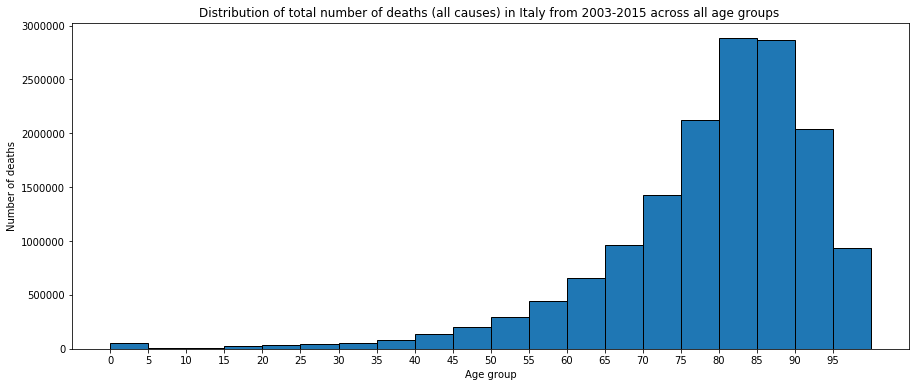

In [47]:
# set figure size, labels and title
plt.rcParams["figure.figsize"] = (15,6)
plt.xlabel('Age group')
plt.ylabel('Number of deaths')
plt.title('Distribution of total number of deaths (all causes) in Italy from 2003-2015 across all age groups ')

pos = np.arange(20)
column_label = np.array(['0','5','10','15','20','25','30','35','40','45',
                      '50','55','60','65','70','75','80','85','90','95'])
# Draw the distribution
plt.bar(x=pos, height=italy_distribution.values[0],tick_label=column_label,width=1,edgecolor='k',align='edge')

### Top 5 types of neoplasm deaths in Italy in 2010
Neoplasm (or tumor) is an important characteristic for cancer diagnosis. The prevalence of neoplasm can, to some extent, reflect how many deaths are related to cancer and provide useful information about healthcare quality in different countries. By looking further into the number of deaths caused by each type of neoplasm, it may also provide insights for clinicians how severe each type of neoplasm is and adopt appropriate actions to the patients.

In our dataset, the cause of deaths is recorded using ICD-10 standard where the codes for [neoplasm](https://www.icd10data.com/ICD10CM/Codes/C00-D49) are from C00 to D48. Note that D49 which implies ***Neoplasms of unspecified behavior*** will not be considered for its vague definition and uncertainty. 

The cause of deaths is the column `Cause` in `mortality` dataframe

In [48]:
# Find all deaths related to neoplasm in italy
neoplasm = italy_mor[(italy_mor['Cause']>='C00')&(italy_mor['Cause']<'D49')]

# Calculate total number of deaths grouped by each type of neoplasm defined in ICD-10
neoplasm_top5 = neoplasm.groupby('Cause').sum()[['Deaths1']].sort_values(by='Deaths1',ascending=False).head(5)
print(neoplasm_top5)
neoplasm_not_top5 = neoplasm.groupby('Cause').sum()[['Deaths1']].sort_values(by='Deaths1',ascending=False)[5:].sum()
neoplasm_top5 = neoplasm_top5.append(neoplasm_not_top5,ignore_index=True)
neoplasm_top5.columns = ['Number of deaths']

# Calculate total number deaths for all causes
total_deaths = italy_mor.groupby('Country').sum()['Deaths1'].values[0]
# Calculate the proportion of deaths caused by each type of neoplasm in the total number of deaths
neoplasm_top5['Proportion of deaths for all causes (%)'] = neoplasm_top5*100.0/(total_deaths*1.0)
# Describe the specific associated organs indicated by the ICD CODE
neoplasm_top5['Description']=['Lung','Breast','Colon','Stomach','Pancreas','Other types of neoplasm']
neoplasm_top5.set_index('Description',inplace=True)

       Deaths1
Cause         
C349    426451
C509    155895
C189    143188
C169    125679
C259    120070


In [49]:
# Define a helper function to label the piechart
def pie_label(pct,data):
    absolute = (pct/100.0) * np.sum(data)
    return "{:.1f}%\n({:.3f}% of deaths for all causes)".format(pct, absolute)

Text(0,0.5,'')

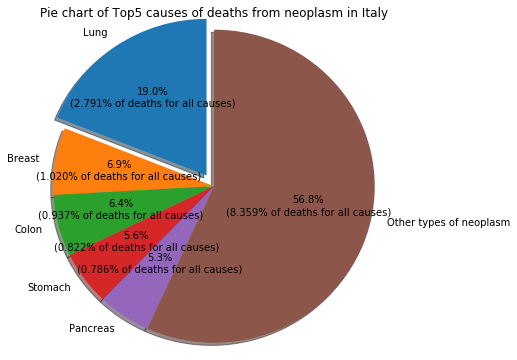

In [50]:
data = neoplasm_top5['Proportion of deaths for all causes (%)']
# Set figure size and title
plt.rcParams["figure.figsize"] = (6,6)

plt.title('Pie chart of Top5 causes of deaths from neoplasm in Italy')

# Draw the pie chart
neoplasm_top5['Proportion of deaths for all causes (%)'].plot(kind='pie',startangle=90,shadow=True,explode=(0.1,0,0,0,0,0),
                                                      radius=1.2,autopct=lambda pct: pie_label(pct, data))
plt.ylabel('')

The top 5 causes of neoplasm deaths in Italy in 2010 is:

| ICD-10 Code        | Number of deaths           | Description |
| ------------- |-------------|-----|
| [C349](https://icd.codes/icd10cm/C349) | 426451 | C34.9 Malignant neoplasm of unspecified part of bronchus or lung |
| [C509](https://icd.codes/icd10cm/C509) | 155895 | C50.9 Malignant neoplasm of breast of unspecified site |
| [C189](https://icd.codes/icd10cm/C189) | 143188 | C18.9 Malignant neoplasm of colon, unspecified |
| [C169](https://icd.codes/icd10cm/C169) | 125679 | C16.9 Malignant neoplasm of stomach, unspecified |
| [C259](https://icd.codes/icd10cm/C259) | 120070 | C25.9 Malignant neoplasm of pancreas, unspecified |

We can see that **C34.9 Malignant neoplasm of unspecified part of bronchus or lung** is the number one cause of neoplasm deaths in Italy in 2010, which constitute 19% of deaths of all types of neoplasm and 2.791% of deaths for all causes (including neoplasm).

### Top 5 age groups of highest number of deaths due to neoplasm in Australia in 2010

In [51]:
age_group_label = np.array(['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49',
                      '50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95+'])


Country code of Australia is: 5020


Text(0.5,1,'Top 5 age groups in Australia dying with Neoplasms cause of death')

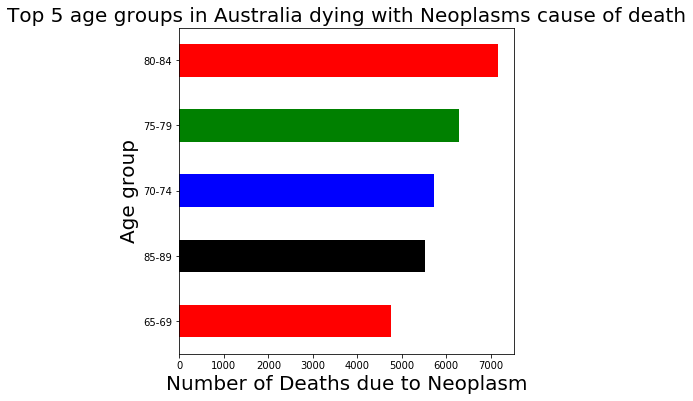

In [52]:
# Find country code of Australia
aus_code = country[(country['name']=='Australia') & (country['Year']==2010)]['Country'].values[0]
print('Country code of Australia is:', aus_code)

# Use the country code to find all records of neoplasm deaths in Australia in 2010
aus_mor = mortality[mortality['Country']==aus_code]
neoplasm_aus_2010 = aus_mor[(aus_mor['Cause']>='C00')&(aus_mor['Cause']<'D49')&(aus_mor['Year']==2010)]

# byage_aus = neoplasm_aus_2010.groupby('Country').sum().loc[:,'Deaths2':'Deaths26']
# Stratify the result in different age group
byage_aus = stratified_deaths(neoplasm_aus_2010)
# Change to a more intuitive column name
byage_aus.columns= age_group_label
# Select top5 neoplasm types that result to most deaths
byage_aus = byage_aus.transpose()
byage_aus.columns=['Deaths in Australia']
byage_aus.index.names=['Age Group']
age_death_top5= byage_aus.sort_values(by='Deaths in Australia',ascending = False).head(5)

# Plot horizontal bar chart to show the top 5 deadly neoplasm types
age_death_top5.plot(kind='barh',legend=False,color=tuple(['r','g','b','k']))
plt.gca().invert_yaxis()
plt.xlabel('Number of Deaths due to Neoplasm',fontsize=20)
plt.ylabel('Age group',fontsize=20)
plt.title('Top 5 age groups in Australia dying with Neoplasms cause of death',fontsize=20)

### Comparison of neoplasm deaths in Italy and Australia in 2010

Firstly, let us denote:
* the total number of population in Italy as $I$
* the total number of population in Australia as $A$
* the number of population in group $g$ as $i_g$ and $a_g$ in Italy and Australia, respectively
* the total number of neoplasm deaths in Italy as $DI$
* the total number of neoplasm deaths in Australia as $DA$
* the number of neoplasm deaths in group $g$ as $di_g$ and $da_g$ in Italy and Australia, respectively

Then we have:
* $I = \sum_{g=1}^{20} i_g$
* $A = \sum_{g=1}^{20} a_g$ 
* $DI = \sum_{g=1}^{20} di_g$
* $DA = \sum_{g=1}^{20} da_g$ 

In order to compare the neoplasm deaths in both countries in 2010, we can compare:
* The absolute number of neoplasm deaths in each group, i.e. $di_g$ and $da_g$ for $g = 1...20$
* The percentage of deaths with respect to the whole poluation, i.e. $\frac{di_g}{I}$ and $\frac{da_g}{A}$ for $g = 1...20$
* The percentage of deaths in each group, i.e. $\frac{di_g}{ig}$ and $\frac{da_g}{ag}$ for $g = 1...20$

#### The absolute number of neoplasm deaths in each group

In [53]:
ita_pop = italy_pop # Total number of people in Italy in 2010 as calculated in previous part

# Calculate total number of people in Australia in 2010
aus_df = pop[(pop['Country']==aus_code)&(pop['Year']==2010)]
aus_pop = aus_df.groupby('Country').sum()['Pop1'].values[0]

# Calculate number of deaths in each age strata in Australia in 2010
# aus_pop_stra = aus_df.groupby('Country').sum().loc[:,'Pop2':'Pop26']
aus_pop_stra = stratified_pop(aus_df)
aus_pop_stra.columns= age_group_label
aus_pop_stra = aus_pop_stra.transpose()
aus_pop_stra.columns=['Number of population in Australia']

# Calculate number of deaths in each age strata in Italy in 2010
# ita_pop_stra = italy_df.groupby('Country').sum().loc[:,'Pop2':'Pop26']
ita_pop_stra = stratified_pop(italy_df)
ita_pop_stra.columns= age_group_label
ita_pop_stra = ita_pop_stra.transpose()
ita_pop_stra.columns=['Number of population in Italy']

byage_aus = byage_aus # neoplasm related deaths by age group in Austalia in 2010 as calculated in previous part

# Calculate neoplasm related deaths by age group in Italy in 2010
neoplasm_ita_2010 = italy_mor[(italy_mor['Cause']>='C00')&(italy_mor['Cause']<'D49')&(italy_mor['Year']==2010)]
#byage_ita = neoplasm_ita_2010.groupby('Country').sum().loc[:,'Deaths2':'Deaths26']
byage_ita = stratified_deaths(neoplasm_ita_2010)
byage_ita.columns= age_group_label
byage_ita = byage_ita.transpose()
byage_ita.columns=['Deaths in Italy']

Text(0,0.5,'Number of total population')

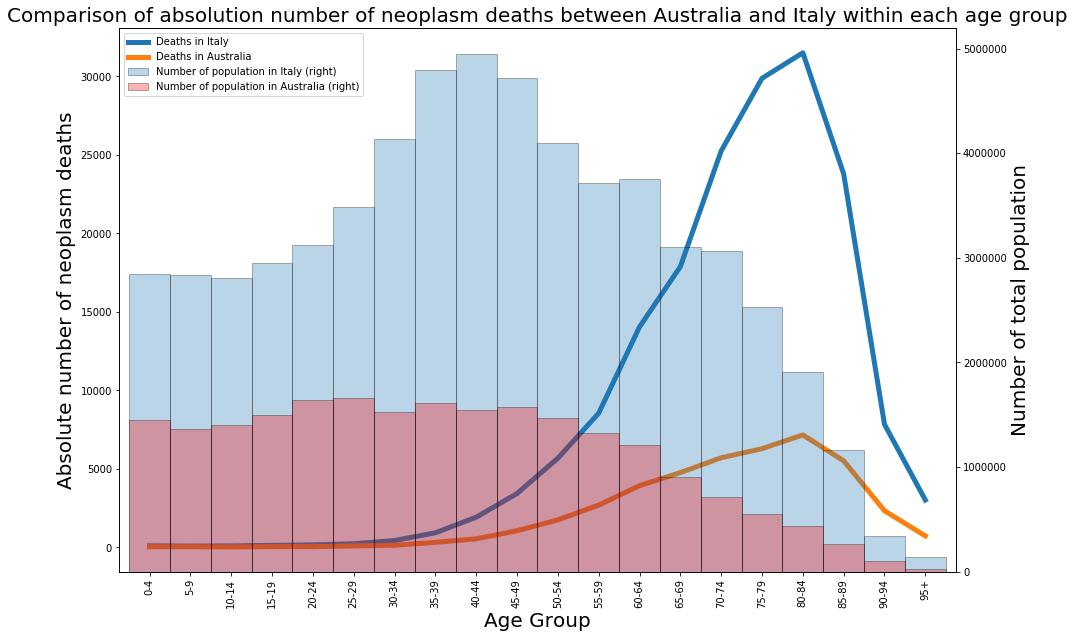

In [54]:
plt.rcParams["figure.figsize"] = (15,10)

# Plot and compare age group stratified deaths in Italy and Australis
ax0 = byage_ita.plot(kind='line',linewidth=5)
ax0.set_xlabel('Age group',fontsize=20)
ax0.set_ylabel('Absolute number of neoplasm deaths',fontsize=20)
ax0.set_title('Comparison of absolution number of neoplasm deaths between Australia and Italy within each age group',fontsize=20)
ax0.set_xticks(np.arange(25))
ax0.set_xticklabels(age_group_label)

byage_aus.plot(kind='line',ax = ax0,linewidth=5)

# Plot the total population distribution with a secondary y-axis on the right
ita_pop_stra.plot(kind='bar',ax = ax0,secondary_y=True,alpha=0.3,width=1,edgecolor='k')
aus_pop_stra.plot(kind='bar',ax = ax0,secondary_y=True,alpha=0.3,width=1,edgecolor='k',color='r')
# label secondary y-axis
plt.ylabel('Number of total population',fontsize=20)

- From the graph, we can see that the age distribution in those two countries is slightly different. Italy has significantly more population ageing between 30 and 60 than between 0 and 30. While Australia has a smooth distribution of age from 0 to 60.
- Meanwhile, starting from age of 30, there are increasingly more deaths due to neoplasm and the number starts to decrease after 80 years old in both countries. 
- Additionally, we can see people are more likely to die of neoplasm when they get older, this is what is expected from the biological point of view.
- Age group 80-84 has a higher number of neoplasm deaths in both countries
- It is also observed that even the number of the population starts to decrease after 45-49 age group, the number of deaths caused by neoplasm still keeps increasing until it reaches a peak at the age group of 80-84 in both countries. This implies an even sharper increase in the proportion of people dead due to neoplasm in those age groups.
- However, based on the absolute number of deaths in each age group, we cannot draw any conclusion that people in Italy are more prone to death due to neoplasm, further analysis is to be done...


#### The percentage of deaths with respect to the whole poluation

[Text(0,0,'0-4'),
 Text(0,0,'5-9'),
 Text(0,0,'10-14'),
 Text(0,0,'15-19'),
 Text(0,0,'20-24'),
 Text(0,0,'25-29'),
 Text(0,0,'30-34'),
 Text(0,0,'35-39'),
 Text(0,0,'40-44'),
 Text(0,0,'45-49'),
 Text(0,0,'50-54'),
 Text(0,0,'55-59'),
 Text(0,0,'60-64'),
 Text(0,0,'65-69'),
 Text(0,0,'70-74'),
 Text(0,0,'75-79'),
 Text(0,0,'80-84'),
 Text(0,0,'85-89'),
 Text(0,0,'90-94'),
 Text(0,0,'95+')]

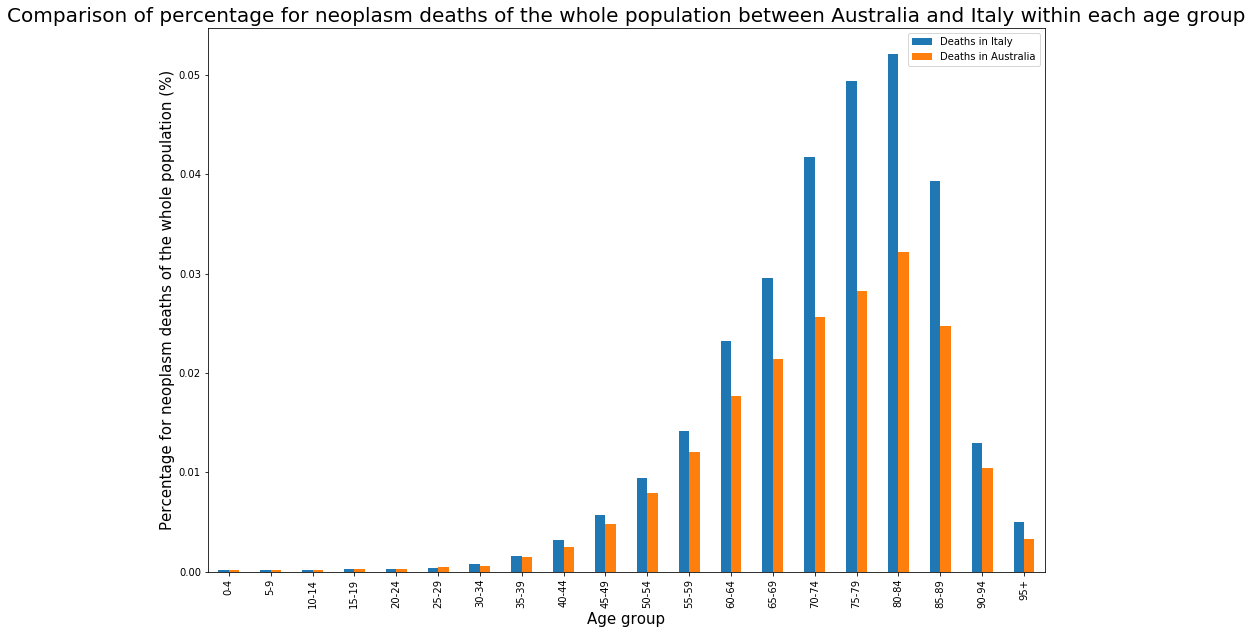

In [55]:
byage_whole = pd.concat([byage_ita*100.0/italy_pop,byage_aus*100.0/aus_pop],axis=1)

plt.rcParams["figure.figsize"] = (15,10)
ax1 = byage_whole.plot(kind='bar')
ax1.set_ylabel('Percentage for neoplasm deaths of the whole population (%)', fontsize=15)
ax1.set_xlabel('Age group', fontsize=15)
ax1.set_title('Comparison of percentage for neoplasm deaths of the whole population between Australia and Italy within each age group',fontsize=20)
ax1.set_xticks(np.arange(20))
ax1.set_xticklabels(age_group_label)


- Firstly, we should see that the scale of the y-axis is very small (about 0.06% as maximum), therefore, for both countries, the prevalence of neoplasm deaths is relatively low. 
- We can also see that, almost for every age group, there is a larger proportion of deaths caused by neoplasm among the whole population in Italy. Therefore, we can conclude that the overall prevalence of neoplasm deaths is higher in Italy.


In [56]:
print('percentage for neoplasm resulted deaths of the whole population in Australia: {0:.3f}%'.format(byage_aus.values.sum()*100.0/aus_pop))
print('percentage for neoplasm resulted deaths of the whole population Italy: {0:.3f}%'.format(byage_ita.values.sum()*100.0/italy_pop))

percentage for neoplasm resulted deaths of the whole population in Australia: 0.194%
percentage for neoplasm resulted deaths of the whole population Italy: 0.289%


* This proves our conclusion above, the overall percentage of neoplasm deaths is 0.289% and 0.194% in Italy and Australia respectively in 2010.

#### The percentage of deaths in each group

[Text(0,0,'0-4'),
 Text(0,0,'5-9'),
 Text(0,0,'10-14'),
 Text(0,0,'15-19'),
 Text(0,0,'20-24'),
 Text(0,0,'25-29'),
 Text(0,0,'30-34'),
 Text(0,0,'35-39'),
 Text(0,0,'40-44'),
 Text(0,0,'45-49'),
 Text(0,0,'50-54'),
 Text(0,0,'55-59'),
 Text(0,0,'60-64'),
 Text(0,0,'65-69'),
 Text(0,0,'70-74'),
 Text(0,0,'75-79'),
 Text(0,0,'80-84'),
 Text(0,0,'85-89'),
 Text(0,0,'90-94'),
 Text(0,0,'95+')]

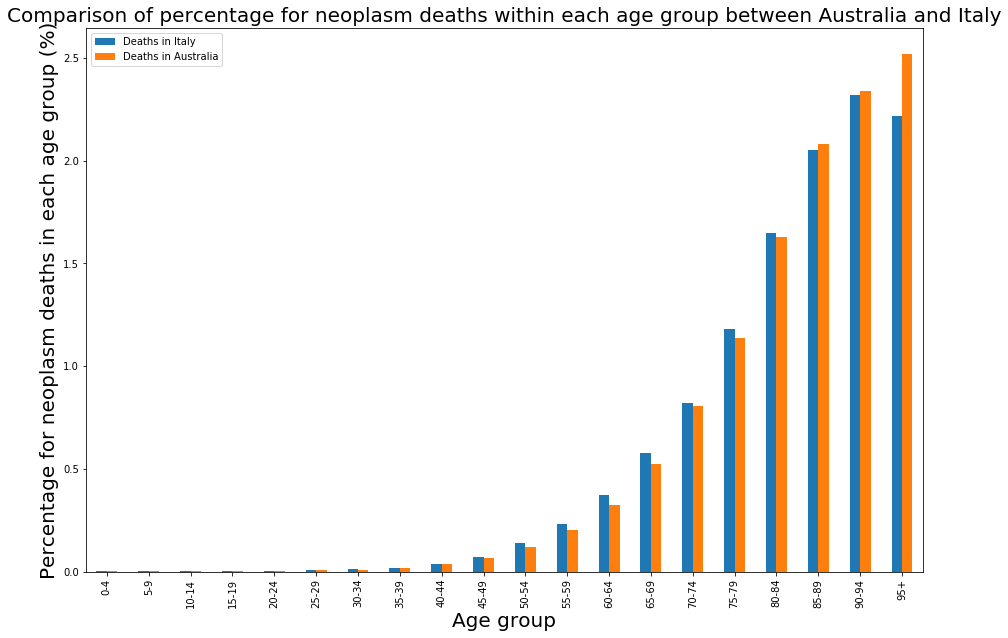

In [57]:
byage_stra = pd.concat([byage_ita*100.0/ita_pop_stra.values,byage_aus*100.0/aus_pop_stra.values],axis=1)

ax2 = (byage_stra).plot(kind='bar')
ax2.set_xlabel('Age group',fontsize=20)
ax2.set_ylabel('Percentage for neoplasm deaths in each age group (%)',fontsize=20)
ax2.set_title('Comparison of percentage for neoplasm deaths within each age group between Australia and Italy',fontsize=20)
ax2.set_xticks(np.arange(20))
ax2.set_xticklabels(age_group_label)


- From the figure above, we can clearly see that the **proportion of deaths due to neoplasm in each age group** is almost the same in both countries.
- Australia suffered a **higher deaths rate** of neoplasm in older age groups. 
- It is also noted that for people ageing 95+, there is a **decrease** in the proportion of deaths due to neoplasm in Italy while an **increase** in Australia, although, the difference is less than 0.3%.

### Conclusion
* Neoplasm is more likely to be the cause of deaths for older people in both countries, which suggests that extensive health care for neoplasm should be offered to older people, especially people who are more than 50 years old. 
* Both countries did not suffer high mortality of neoplasm in 2010.
* Overall, Neoplasm caused deaths were more prevalent in Italy in 2010.
* However, for people who were 85 or older, the death rate was higher in Australia in 2010.